# Linear model in WDE

In [1]:
#WDE dataset
WDE_path="C:/Users/aliba/OneDrive/Desktop/UNIVERSITA/TESI/DATASET/WalkingDistanceEstimation-master/dataset/"
classi=['armhand', 'pocket', 'calling', 'swing', 'handheld']
n_elem=500
n_left=50

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd

#model
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV

#regression
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score


#visualization
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.features import rank1d, rank2d
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.model_selection import LearningCurve



from ipynb.fs.full.functioncollection import trueeqWDE,error_rate, importWDE, filtWDE, f_ext_WDE,makeeqWDE,full_regr_dataset,is_in_range,ist_stride_lenght, random_list_range,SLE_buttfilter, del_outliers, feature_extraction


## Import all WDE

In [2]:
DATASET, stop_list =importWDE()

PDR_Raw_2019-03-20-09-10-12 {'armhand': 0, 'pocket': 0, 'calling': 0, 'swing': 0, 'handheld': 288}
Outliers eliminati	 {'armhand': 0, 'pocket': 0, 'calling': 0, 'swing': 0, 'handheld': 12} 

PDR_Raw_2019-03-20-09-21-02 {'armhand': 0, 'pocket': 0, 'calling': 284, 'swing': 0, 'handheld': 0}
Outliers eliminati	 {'armhand': 0, 'pocket': 0, 'calling': 15, 'swing': 0, 'handheld': 0} 

PDR_Raw_2019-03-20-09-29-55 {'armhand': 0, 'pocket': 0, 'calling': 34, 'swing': 0, 'handheld': 45}
Outliers eliminati	 {'armhand': 0, 'pocket': 0, 'calling': 3, 'swing': 0, 'handheld': 1} 

PDR_Raw_2019-03-21-08-32-39 {'armhand': 196, 'pocket': 0, 'calling': 0, 'swing': 0, 'handheld': 0}
Outliers eliminati	 {'armhand': 26, 'pocket': 0, 'calling': 0, 'swing': 0, 'handheld': 0} 

PDR_Raw_2019-03-21-09-07-51 {'armhand': 527, 'pocket': 0, 'calling': 0, 'swing': 0, 'handheld': 0}
Outliers eliminati	 {'armhand': 203, 'pocket': 0, 'calling': 0, 'swing': 0, 'handheld': 0} 

PDR_Raw_2019-03-21-11-57-56 {'armhand': 0, 'p

In [3]:
print(stop_list)

{'armhand': [0, 196, 723], 'pocket': [0, 142, 299, 685], 'calling': [0, 284, 318, 593, 764], 'swing': [0, 197, 336, 765, 1150, 1153, 1385], 'handheld': [0, 288, 333, 758, 1655, 3381, 3949, 5163, 5827]}


In [4]:
#select only one mode
mode="handheld"
for c in classi:
    if c!=mode:
        del DATASET[c]
        del stop_list[c]

**"DATASET"** è la variabile in cui importiamo il nostro dataset WDE, è un dizionario che ha come chiavi le cinque modalità, come valori ha una lista. La lista è una lista di stride, dove ogni stride è un dizionario che rappresenta le misrazioni dello stride

In [5]:
print(type(DATASET))
for c,v in DATASET.items():
    print(c,type(v),len(v),type(v[0]),v[0].keys())

<class 'dict'>
handheld <class 'list'> 5827 <class 'dict'> dict_keys(['target', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'SensorTimestamp'])


##### Applichiamo il butterworth filter di primo ordine con cutoff frequency di 3Hz ad ogni stride

In [6]:
filtWDE(DATASET);

Filtering:##
Done!



 **"Feature_DS"** è un dizionario con chiavi le classi, e valori dizionari con chiavi 'feature' che contiene la list di feature dello stride e 'target' che contiene il float della lunghezza dello stride.

In [7]:
Feature_DS=f_ext_WDE(DATASET)


Extracting handheld:#########

In [8]:
for k,v in Feature_DS.items():
    print("\n",k,type(v),v.keys(),len(v['feature']),end=" ")
    if k==mode:
        print(len(v['feature'][0]),len(v['target']))
  


 armhand <class 'dict'> dict_keys(['feature', 'target']) 0 
 pocket <class 'dict'> dict_keys(['feature', 'target']) 0 
 calling <class 'dict'> dict_keys(['feature', 'target']) 0 
 swing <class 'dict'> dict_keys(['feature', 'target']) 0 
 handheld <class 'dict'> dict_keys(['feature', 'target']) 5827 92 5827


* **DS_train** è il dataset equilibrato di train prendendo i primi 500 elementi per ogni modalità
* **DS_test** è il dataset di test equilibrato prendendo gli *ultimi* 50 elementi per ogni modalità

In [9]:
#nt=int(len(Feature_DS[mode]['target'])/10)
DS_train,DS_test = trueeqWDE(Feature_DS,stop_list,n_train=2800,n_test=280)

In [10]:
for k,v in DS_train.items():
    print("\n",k,type(v),v.keys(),len(v['feature']),end=" ")
    if k==mode:
        print(len(v['feature'][0]),len(v['target']))



 armhand <class 'dict'> dict_keys(['feature', 'target']) 0 
 pocket <class 'dict'> dict_keys(['feature', 'target']) 0 
 calling <class 'dict'> dict_keys(['feature', 'target']) 0 
 swing <class 'dict'> dict_keys(['feature', 'target']) 0 
 handheld <class 'dict'> dict_keys(['feature', 'target']) 2800 92 2800


In [11]:
for k,v in DS_test.items():
    print("\n",k,type(v),v.keys(),len(v['feature']),end=" ")
    if k==mode:
        print(len(v['feature'][0]),len(v['target']))


 armhand <class 'dict'> dict_keys(['feature', 'target']) 0 
 pocket <class 'dict'> dict_keys(['feature', 'target']) 0 
 calling <class 'dict'> dict_keys(['feature', 'target']) 0 
 swing <class 'dict'> dict_keys(['feature', 'target']) 0 
 handheld <class 'dict'> dict_keys(['feature', 'target']) 280 92 280


* **regr_dataset_train** è il dataset formattato per la regressione per il train, non tiene in considerazione le modalità ed unisce tutte le feature in una lista e così tutti i target. E' un dizionario con chiavi 'feature' e 'target'
* **regr_dataset_test** è lo stesso, ma con i dati di test

In [12]:
regr_dataset_train, regr_dataset_test = full_regr_dataset(DS_train,DS_test)

In [13]:
for k,v in regr_dataset_train.items():
    print(k,type(v),len(v),type(v[0]))

feature <class 'list'> 2800 <class 'list'>
target <class 'list'> 2800 <class 'float'>


In [14]:
for k,v in regr_dataset_test.items():
    print(k,type(v),len(v),type(v[0]))

feature <class 'list'> 280 <class 'list'>
target <class 'list'> 280 <class 'float'>


Isoliamo i singoli **F_x,F_y** rispettivamete feature e target del train e **F_x_test,F_y_test** rispettivamente feature e target di test

In [15]:
F_x=np.array(regr_dataset_train["feature"])
F_y=np.array(regr_dataset_train["target"])
F_x_test=np.array(regr_dataset_test["feature"])
F_y_test=np.array(regr_dataset_test["target"])

Vediamo come sono distibuite le lunghezze registrate degli stride

Registered Stride lenght: Min:  1.006223362540999 , Max:  1.917364683119593
Media= 1.3709574082485223; Deviazione standard= 0.0762269550613965.


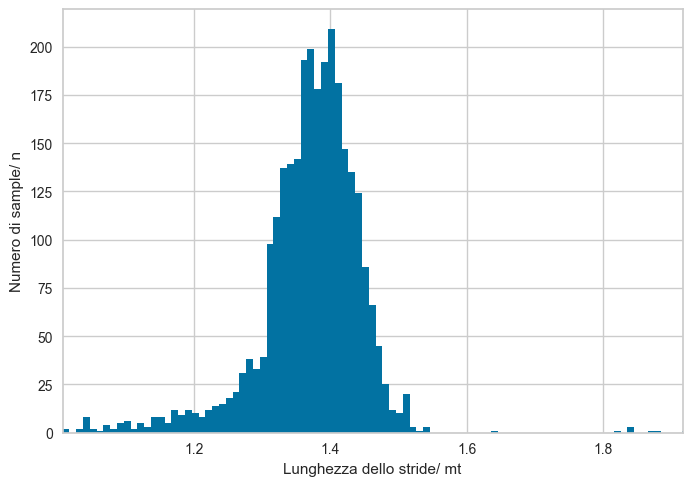

0

In [16]:
#istogramma dei target F_y
ist_stride_lenght(F_y)

### -------------------------------------------------Feature Analysis-------------------------------------------------
<br />Salviamo la lista dei nomi delle feature.

In [17]:
feature_name=['Acc_X-mean', 'Acc_X-std', 'Acc_X-ske', 'Acc_X-kurt', 'Acc_X-iqr', 'Acc_X-Ma', 'Acc_X-zc', 'Acc_X-A1', 'Acc_X-F1', 'Acc_X-A2', 'Acc_X-F2', 'Acc_Y-mean', 'Acc_Y-std', 'Acc_Y-ske', 'Acc_Y-kurt', 'Acc_Y-iqr', 'Acc_Y-Ma', 'Acc_Y-zc', 'Acc_Y-A1', 'Acc_Y-F1', 'Acc_Y-A2', 'Acc_Y-F2', 'Acc_Z-mean', 'Acc_Z-std', 'Acc_Z-ske', 'Acc_Z-kurt', 'Acc_Z-iqr', 'Acc_Z-Ma', 'Acc_Z-zc', 'Acc_Z-A1', 'Acc_Z-F1', 'Acc_Z-A2', 'Acc_Z-F2', 'Gyr_X-mean', 'Gyr_X-std', 'Gyr_X-ske', 'Gyr_X-kurt', 'Gyr_X-iqr', 'Gyr_X-Ma', 'Gyr_X-zc', 'Gyr_X-A1', 'Gyr_X-F1', 'Gyr_X-A2', 'Gyr_X-F2', 'Gyr_Y-mean', 'Gyr_Y-std', 'Gyr_Y-ske', 'Gyr_Y-kurt', 'Gyr_Y-iqr', 'Gyr_Y-Ma', 'Gyr_Y-zc', 'Gyr_Y-A1', 'Gyr_Y-F1', 'Gyr_Y-A2', 'Gyr_Y-F2', 'Gyr_Z-mean', 'Gyr_Z-std', 'Gyr_Z-ske', 'Gyr_Z-kurt', 'Gyr_Z-iqr', 'Gyr_Z-Ma', 'Gyr_Z-zc', 'Gyr_Z-A1', 'Gyr_Z-F1', 'Gyr_Z-A2', 'Gyr_Z-F2', 'M_Acc-mean', 'M_Acc-std', 'M_Acc-ske', 'M_Acc-kurt', 'M_Acc-iqr', 'M_Acc-Ma', 'M_Acc-zc', 'M_Acc-A1', 'M_Acc-F1', 'M_Acc-A2', 'M_Acc-F2', 'M_Gyr-mean', 'M_Gyr-std', 'M_Gyr-ske', 'M_Gyr-kurt', 'M_Gyr-iqr', 'M_Gyr-Ma', 'M_Gyr-zc', 'M_Gyr-A1', 'M_Gyr-F1', 'M_Gyr-A2', 'M_Gyr-F2', 'A-C CC', 'wei', 'kim', 'scar']
print(f"Abbiamo: {len(feature_name)} feature.")

Abbiamo: 92 feature.


**rank1d e rank2d** offrono la possibilità di visualizzare in modo semplice ed intuitivo il ranking delle feature.
In particolare:

* **rank1d** utilizza shapiro da scipy.stats per calcolare lo score di ogni feature e poi plotta lo score in un barchart di matplotlib.
* **rank2d** valuta lo score per ogni coppia di feature, le funzioni di scoring supportate sono <"pearson","covariance","spearman","kendalltau"> che misurano quanto le feature sono legate tra di loro; noi utilizziamo "pearson".

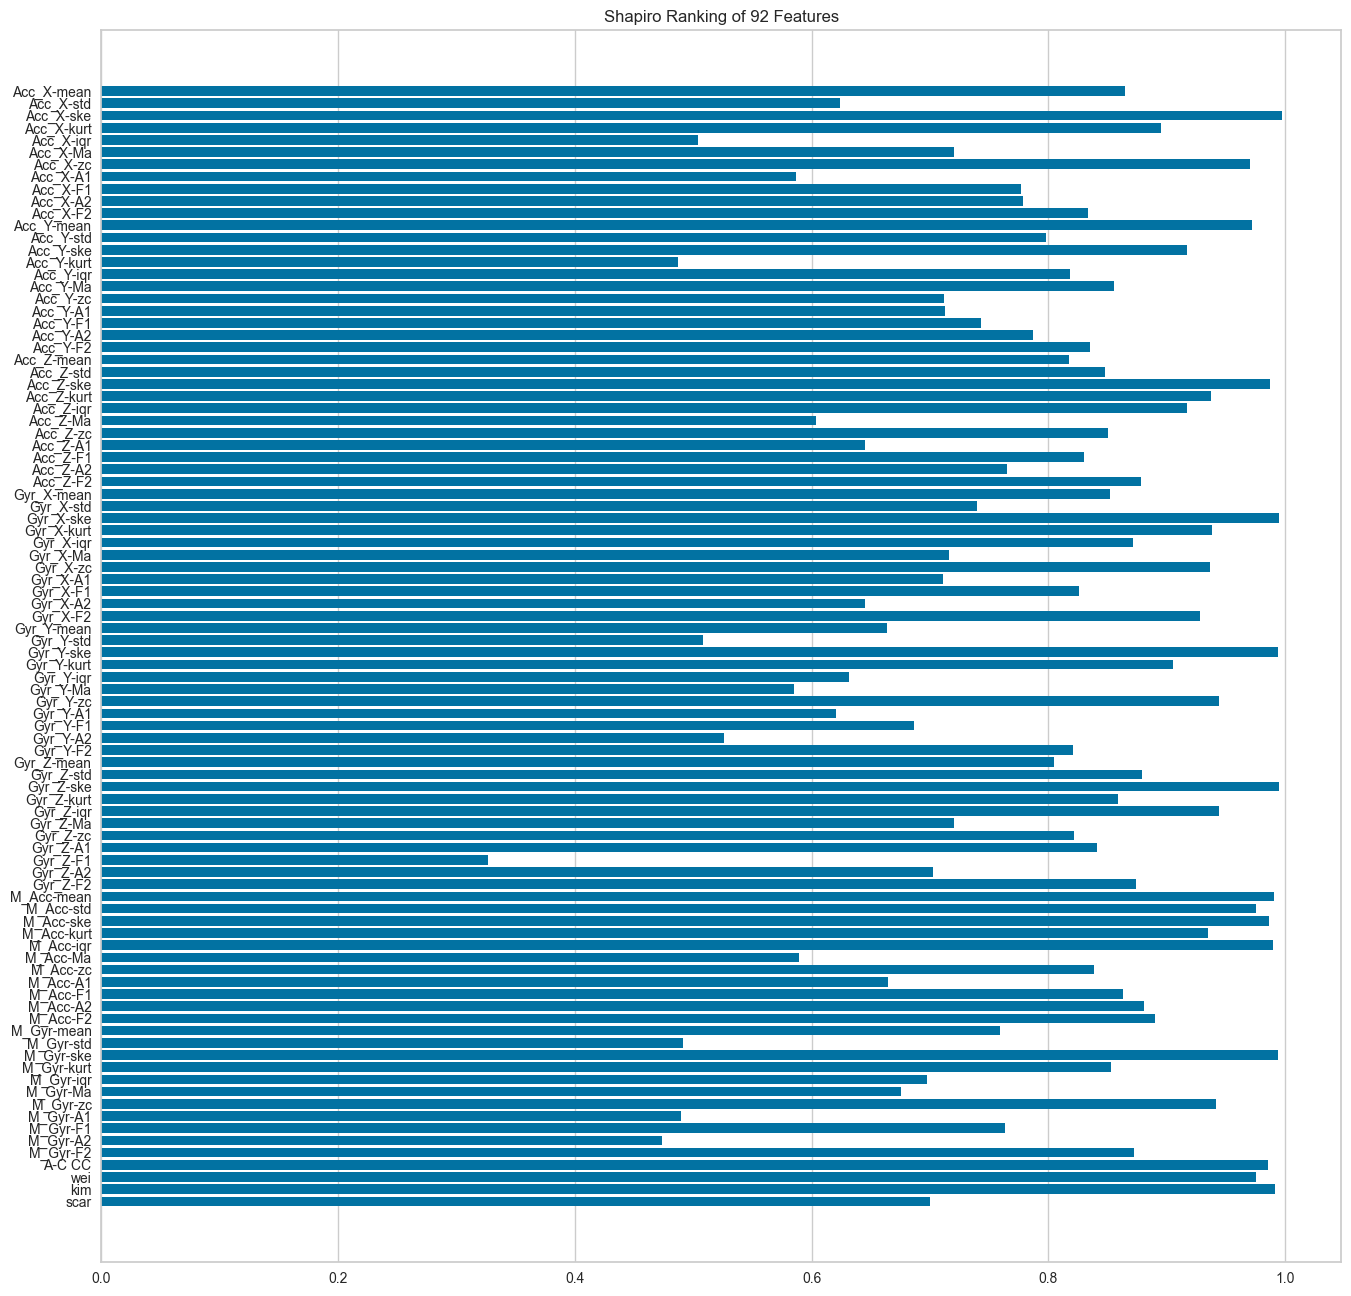

In [18]:
#rank1d
_, axes = plt.subplots(ncols=1, figsize=(16,16))
rank1d(F_x,F_y,features=feature_name,ax=axes , show=False)
plt.show()

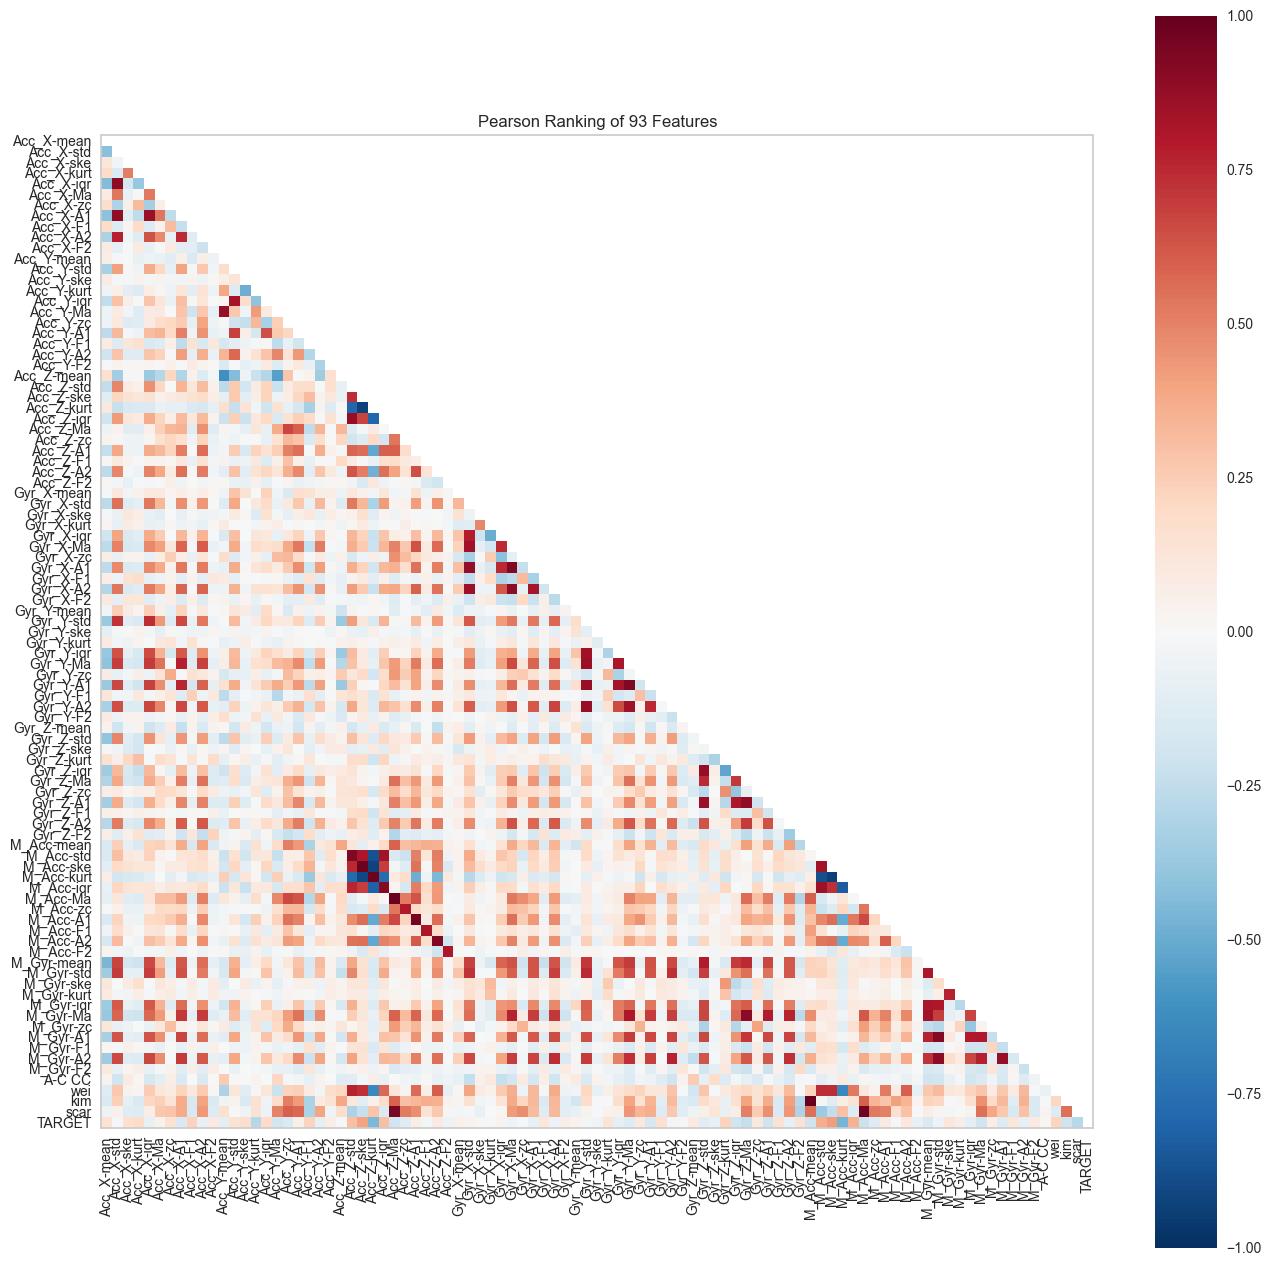

In [19]:
####rank2d

##Per visualizzare cosa sceglierà f_regression
#devo fare in modo che tra le feature ci sia anche il target #poi vedere solo la linea riferita al target e vedere quelli col pearson score migliore

HP_x=np.hstack((F_x,np.reshape(F_y,(-1,1))))

HP_featurename=feature_name+["TARGET"]

_, axes = plt.subplots(ncols=1, figsize=(16,16))

rank2d(HP_x,features=HP_featurename,ax=axes , show=False)

plt.show()

#Si vede sia ogni coppia di feature come è relazionata, sia il pearson score con il target di ogni feature!

# Linear Regression
### Descrizione:

* **input** : F_x ed F_y che sono rispettivamente il vettore di vettori di feature ed il vettore di target.
* **perf** è un oggetto scorer costruito dalla funzione che noi desideriamo usare comemetro di valutazione per le performance, nel nostro caso error_rate.
* **kf** è l'oggetto che crea gli indici per dividere i nostri input in k (10) fold da usare per la cross validation.
* **pipe** è l'oggetto che rappresenta la pipeline degli estimatori, ogni step fa il fit con il predict del precedente; in ordine l'input viene ridotto selezionando le feature (SelectKbest con f_regression)-> le feature vengono scalate (StandardScaler)-> il modello lineare viene fittato (LinearRegression) f_regression usa come metodo di ranking il pearson tra la singola feature ed il target.
* **est** è l'istanza GridSearchCV che permette di eseguire la cross validation tramite gli indici di kf (facendo quindi in tutto k (10) train usando ogni volta un fold diverso per il test) e di volta in volta testa una nuova combinazione di parametri presenti nel dizionario param (nel nostro caso solo quante feature selezionare, da 1 a 92). Per ogni parametro esegue una 10-fold cross-validation e calcola la media dello score calcolato con perf. Infine restituisce come .best_params_ i parametri con cui si ha avuto la migliore media, con .best_estimator_ restituisce un estimatore fittato su tutti i dati di train con il best_param_. 
Salvo quindi il miglior estimatore in best che rappresenta quindi l'estimatore che ha il minor error_rate medio nei k fold con i migliori parametri, fittato su tutto il set di dati di train senza la divisione in fold.

In [20]:
#F_x feature #F_y target

#Creiamo l'oggetto per valutare le performance tramite la nostra funzione
perf=make_scorer(error_rate, greater_is_better=False)

#Creiamo oggetto cross-validator tramite KFold
kf = KFold(n_splits=10, shuffle= True, random_state=0)#con lo shuffle= False assicuriamo che i blocchi siano contingenti (un blocco può essere indici 0-1-2 per esempio [ogni indice per noi è uno stride!]) con shuffle= True il blocco può essere anche 0,3,7. #creiamo l'oggetto del cross-validator. Con n_splits=10 facciamo 10 split (9 train ed 1 test) come dividere 90% e 10%, se vogliamo 80-20 n_splits=5 n_ripetizioni=kf.get_n_splits(F_x)#salviamo il numero di ripetizioni

##############GRIDSEARCH_CV
#select = SelectKBest(score_func=f_regression)
#scaler=StandardScaler()
#regr = linear_model.LinearRegression()

#pipeline di estimatori 
pipe = Pipeline([('select',SelectKBest(score_func=f_regression)),('scaler', StandardScaler()), ('regr', linear_model.LinearRegression())])
print("La pipeline è composta da: ", pipe)

#Parametri da testare: 
param=[{'select__k':[x+1 for x in range(F_x.shape[1])]}]

#Creiamo l'oggetto per la ricerca dei parametri
est=GridSearchCV(pipe,param_grid= param, cv=kf,verbose=1,scoring="r2", return_train_score= True) #Fittiamo sul nostro blocco di dati
est.fit(F_x,F_y)

#Ricaviamo il miglior set di parametri
best=est.best_estimator_
print(f"\n\nIl miglior estimatore si ha col parametro {est.best_params_} ottenuto all'indice: {est.best_index_} .\n\n L'R2-score medio è di {est.best_score_:.3f} !")


La pipeline è composta da:  Pipeline(steps=[('select',
                 SelectKBest(score_func=<function f_regression at 0x0000022F30EB68C0>)),
                ('scaler', StandardScaler()), ('regr', LinearRegression())])
Fitting 10 folds for each of 92 candidates, totalling 920 fits


Il miglior estimatore si ha col parametro {'select__k': 87} ottenuto all'indice: 86 .

 L'R2-score medio è di 0.412 !


## -----MODEL EVALUETION-----
**LearningCurve** permette di vedere l'evoluzione delle performance del modello facendo la media dello score nella cross validation (asse y) in base al numero di train samples (asse x).
Permette di valutare:
* Se il modello necessita di maggiori dati di training (se convege vuol dire che aumentare il numero di sample migliora le performance, se converge in un valore troppo alto vuol dire che necessita più sample in training)
* Se l'errore dipende di più dalla media o dalla varianza

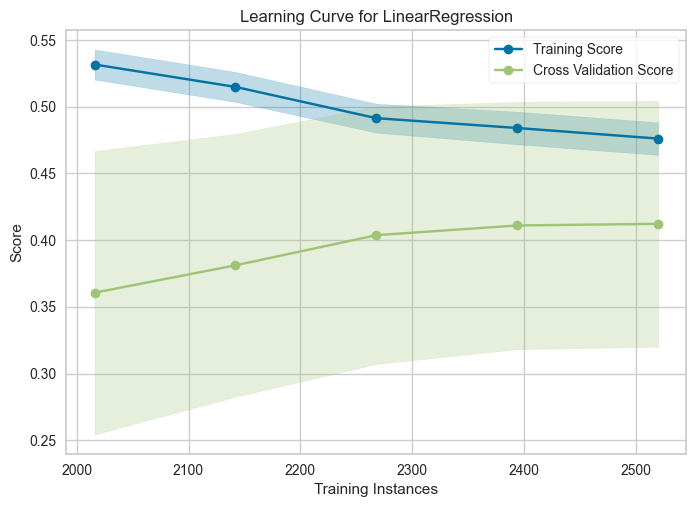

<AxesSubplot:title={'center':'Learning Curve for LinearRegression'}, xlabel='Training Instances', ylabel='Score'>

In [21]:
viz = LearningCurve(best, scoring="r2",cv=kf,train_sizes=np.linspace(0.8,1.0,5))

viz.fit(F_x,F_y) # Fit the data to the visualizer
viz.show()

## -----FEATURE IMPORTANCE-----
**FeatureImportances** permette di plottare le feature del best estimator ordinate in ordine decrescente secondo la loro importanza!

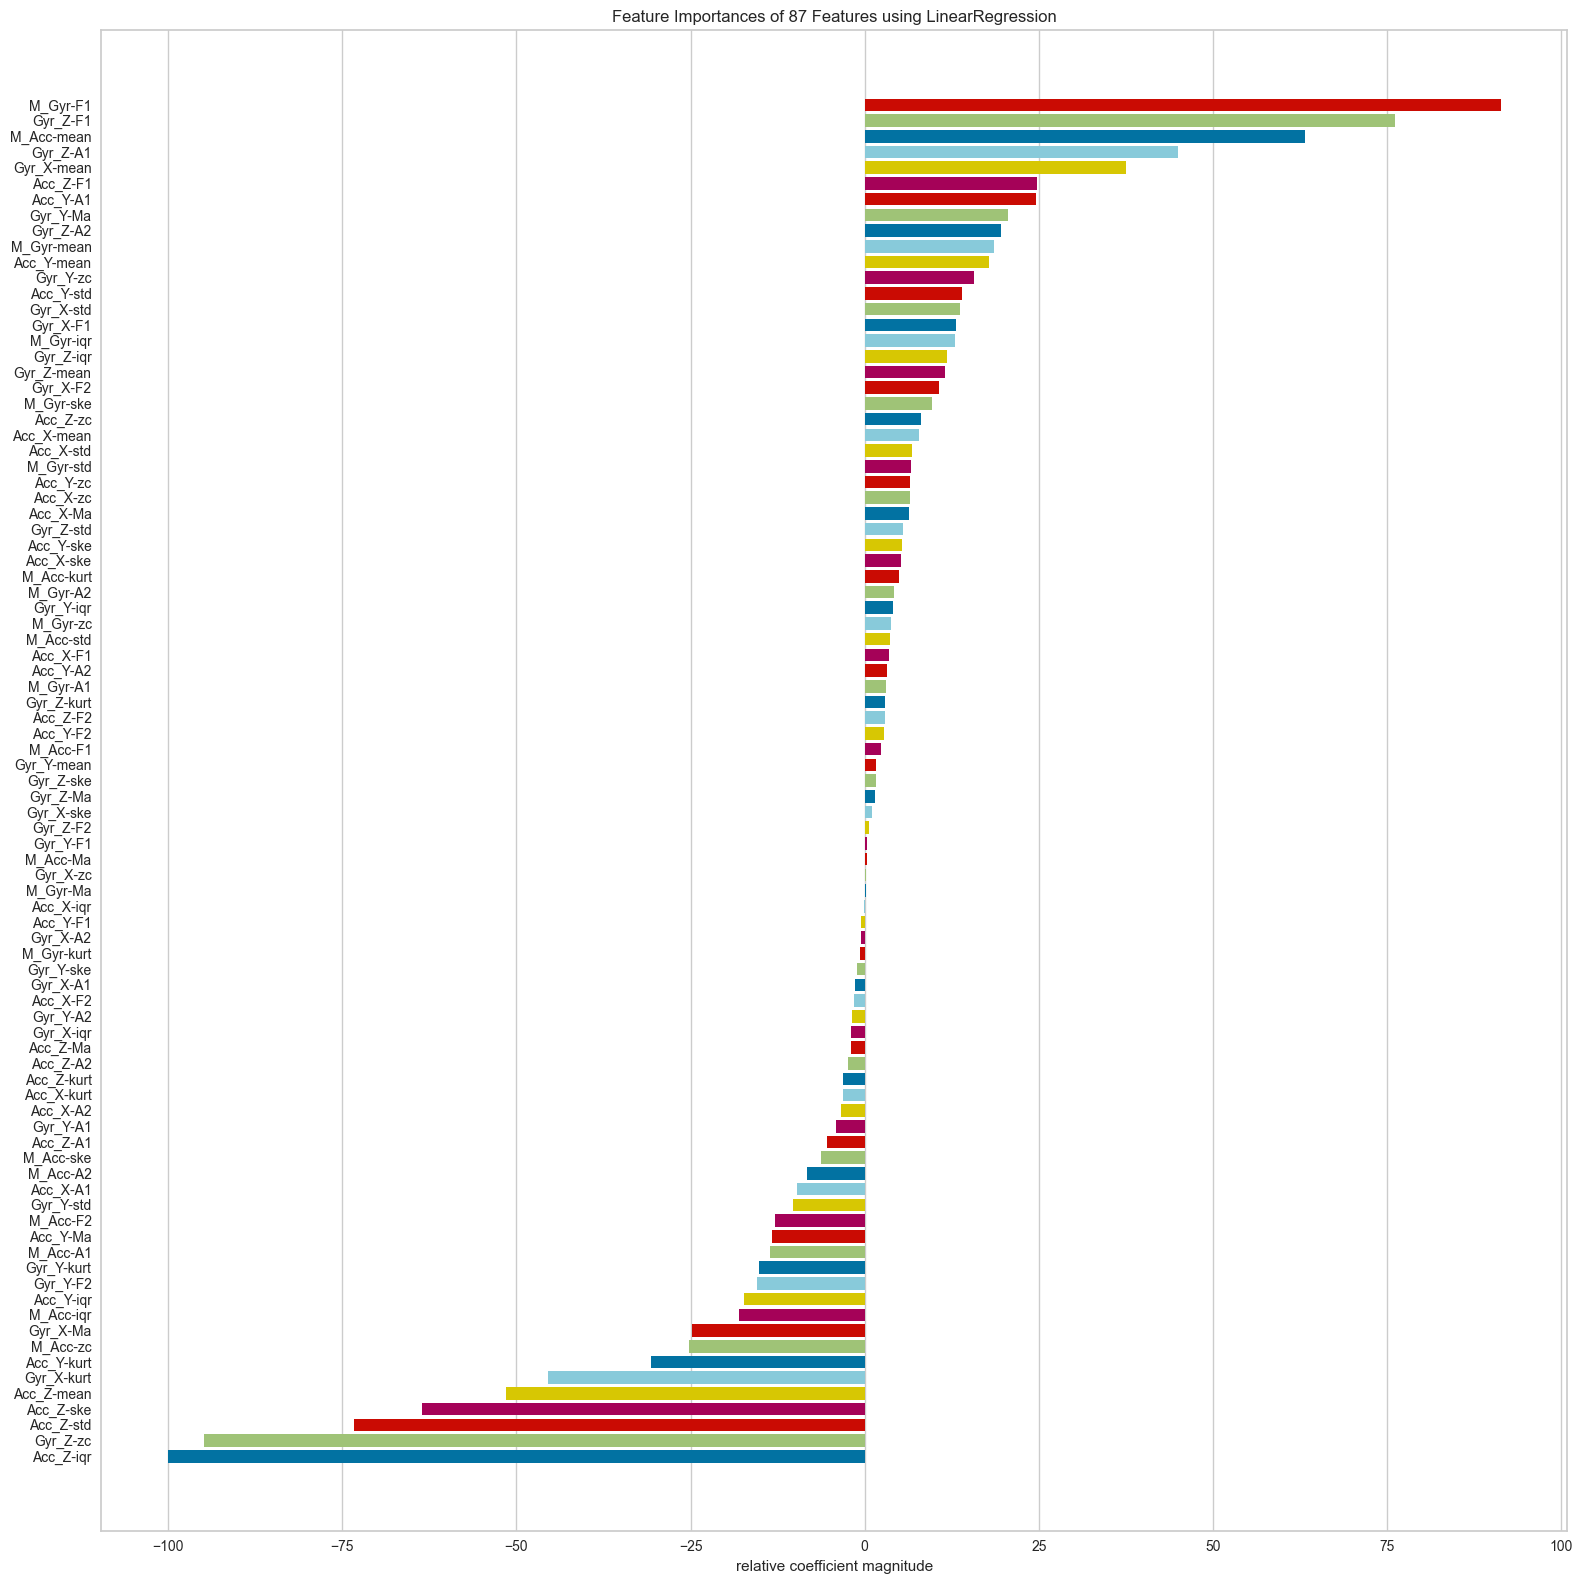

<AxesSubplot:title={'center':'Feature Importances of 87 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>

In [22]:
#per la feature importance dobbiamo scomporre la pipeline, ci serve solo l'ultimo step, il regressore nominato 'regr'.
##Attenzione FeatureImportance.fit trasforma il regressore, quindi creiamone uno nuovo
kk=est.best_params_['select__k']
skb=SelectKBest(score_func=f_regression, k=kk)
temp_X=skb.fit_transform(F_x,F_y)
stdsc=StandardScaler()
temp_X=stdsc.fit_transform(temp_X)
linmod=linear_model.LinearRegression()

_, axes = plt.subplots(ncols=1, figsize=(16,16))
viz = FeatureImportances(linmod,ax=axes,labels=feature_name)
viz.fit(temp_X,F_y)
viz.show()

##### Visualizziamo tutti i risultati del GridSearchCV
*Qui possiamo vedere ogni split con ogni parametro che score ha ottenuto, sia per il train (9 fold) che per il test (1 fold).*
Es: split3 è la cross validation usando come train fold (0..2,4..10) e come test fold 3 .

Le righe corrispondono alle performance dell'estimatore con un determinato parametro (92 righe come il numero di parametri testati); le colonne rappresentano gli il determinato score per ogni parametro.

In [23]:
risultati=pd.DataFrame(est.cv_results_)
display(risultati)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_select__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007175,0.004239,0.000000,0.000000,1,{'select__k': 1},0.257723,0.190931,0.075287,0.268805,...,0.234517,0.208945,0.225696,0.207641,0.213849,0.213562,0.208641,0.221135,0.216531,0.008170
1,0.001565,0.004695,0.000000,0.000000,2,{'select__k': 2},0.258982,0.190739,0.075642,0.265832,...,0.234740,0.209534,0.225910,0.208058,0.214026,0.213618,0.208786,0.221421,0.216783,0.008140
2,0.005666,0.005873,0.002361,0.005022,3,{'select__k': 3},0.268374,0.199494,0.063897,0.271897,...,0.239274,0.211883,0.229396,0.211337,0.216202,0.216682,0.211012,0.224788,0.219665,0.008712
3,0.006352,0.006841,0.000000,0.000000,4,{'select__k': 4},0.268176,0.199472,0.061452,0.271775,...,0.239415,0.211895,0.229428,0.211354,0.216296,0.216701,0.211024,0.224875,0.219708,0.008744
4,0.005342,0.007000,0.001561,0.004683,5,{'select__k': 5},0.260035,0.218646,0.085539,0.258577,...,0.245104,0.222718,0.237274,0.222581,0.225132,0.223318,0.218661,0.231754,0.227876,0.007632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.047012,0.005704,0.000000,0.000000,88,{'select__k': 88},0.512853,0.382440,0.271559,0.297877,...,0.497754,0.495943,0.477477,0.482739,0.469776,0.472911,0.455727,0.481884,0.477450,0.012250
88,0.042597,0.007158,0.001564,0.004693,89,{'select__k': 89},0.520597,0.371704,0.270173,0.297889,...,0.497839,0.495944,0.478272,0.483583,0.469834,0.473077,0.460683,0.483725,0.479061,0.011325
89,0.045454,0.007198,0.000000,0.000000,90,{'select__k': 90},0.520031,0.366028,0.272750,0.298843,...,0.498100,0.495967,0.478760,0.483583,0.475043,0.473718,0.463380,0.483744,0.480270,0.010564
90,0.036061,0.004736,0.006252,0.007657,91,{'select__k': 91},0.525599,0.360539,0.275202,0.301560,...,0.498352,0.497655,0.478767,0.484153,0.475269,0.479337,0.463856,0.484085,0.481697,0.010102


Selezioniamo solo i dati relativi all'errore negli split di train e test
Per poter costruire i seguenti boxplot.

In [24]:
#lable di tutte le colonne
column_names=list(risultati)
#lable di ciò che non ci interessa nei nuovi dataframe
column_names=[x for x in column_names if x[0:5]!="split"]
#creiamo un nuovo dataframe eliminando queste colonne 
data=risultati.drop(column_names,axis=1)

#creiamo due nuovi dataframe con solo split test e split train 
column_names=list(data)
data_train=data.drop(column_names[:int(len(column_names)/2)],axis = 1)
data_test=data.drop(column_names[int(len(column_names)/2):],axis = 1)
display(data_train.iloc[[0,1, -1]])
display(data_test.iloc[[0,1, -1]])

,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score
0,0.212310,0.219016,0.234517,0.208945,0.225696,0.207641,0.213849,0.213562,0.208641,0.221135
1,0.212442,0.219297,0.234740,0.209534,0.225910,0.208058,0.214026,0.213618,0.208786,0.221421
91,0.472056,0.484055,0.501095,0.497891,0.480113,0.484559,0.475886,0.479565,0.464152,0.484600


,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
0,0.257723,0.190931,0.075287,0.268805,0.102954,0.266742,0.238441,0.245064,0.290537,0.172841
1,0.258982,0.190739,0.075642,0.265832,0.103453,0.265397,0.239143,0.246462,0.291567,0.172576
91,0.526509,0.361204,0.266412,0.302454,0.384404,0.384770,0.413822,0.439611,0.602616,0.398720


Plottiamo le performance al variare del parametro k
Nell'asse x il numero di feature selezionate, nell'asse y il relativo error_rate per il nostro dataset.

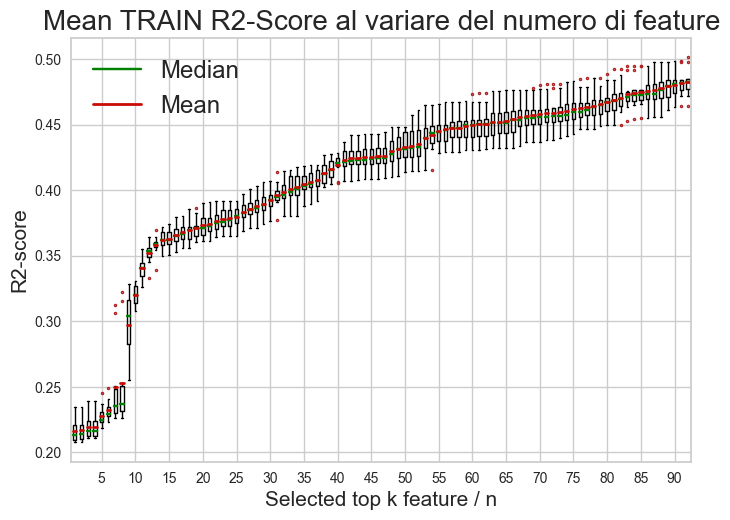

In [25]:
#plot train
boxdata=data_train.values
flierprops = dict(marker='.',markeredgecolor='firebrick', markersize=3, linestyle='none')
medianprops = dict(linestyle='-', linewidth=1.75, color='green')
meanprops = dict(linestyle='-',linewidth=2,color='r')

bp=plt.boxplot(boxdata.tolist(), flierprops=flierprops, medianprops=medianprops, showmeans= True, meanline = True, meanprops=meanprops)
plt.xticks([x for x in range(1,len(risultati["mean_train_score"])+1) if x%5==0],[str(x) for x in param[0]["select__k"] if x%5==0])
plt.xlabel("Selected top k feature / n",fontsize=15)
plt.ylabel("R2-score",fontsize=15)
plt.grid(True)
plt.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'], fontsize='x-large')
plt.title("Mean TRAIN R2-Score al variare del numero di feature",fontsize=20)
plt.show()

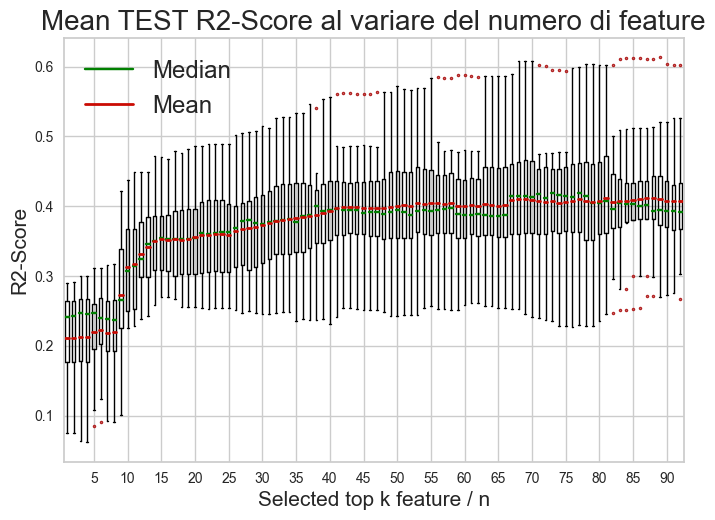

In [26]:
#plot test
boxdata=data_test.values
flierprops = dict(marker='.',markeredgecolor='firebrick', markersize=3, linestyle='none')
medianprops = dict(linestyle='-', linewidth=1.75, color='green') 
meanprops = dict(linestyle='-',linewidth=2,color='r')

bp=plt.boxplot(boxdata.tolist(), flierprops=flierprops, medianprops=medianprops, showmeans= True, meanline = True, meanprops=meanprops)
plt.xticks([x for x in range(1,len(risultati["mean_test_score"])+1) if x%5==0],[str(x) for x in param[0]["select__k"] if x%5==0])
plt.xlabel("Selected top k feature / n",fontsize=15)
plt.ylabel("R2-Score",fontsize=15)
plt.grid(True)
plt.legend([bp['medians'][0], bp['means'][0]], ['Median', 'Mean'], fontsize='x-large')
plt.title("Mean TEST R2-Score al variare del numero di feature",fontsize=20)
plt.show()

### <span style="color:blue"> Alla luce dei seguenti dati potrebbe essere conveniente non utilizzare il miglior estimatore, in quel caso basterebbe creare una pipeline allo stesso modo, utilizzando come parametro il parametro desiderato, senza l'utilizzo di GridSearchCV <span /> 
Es (k=20):

best = Pipeline([('select',SelectKBest(score_func=f_regression,k=20)),('scaler', StandardScaler()), ('regr', linear_model.LinearRegression())])

Calcoliamo Akaike Information Criterion (**AIC**) per il modello con featre da 1-92 e vediamo il contenuto informativo

In [27]:
import statsmodels.api as sm

AICs=[]
print("Fitting model:",end=" ")
for sk in [x+1 for x in range(92)]:

    print(f"{sk}.",end="")
    SKB=SelectKBest(score_func=f_regression, k=sk)
    t_X=SKB.fit_transform(F_x,F_y)
    SSC=StandardScaler()
    t_X=SSC.fit_transform(t_X)
                     
    #fit regression model
    m_a = sm.OLS(F_y, t_X).fit()
    
    AICs.append(m_a.aic)

Fitting model: 1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.30.31.32.33.34.35.36.37.38.39.40.41.42.43.44.45.46.47.48.49.50.51.52.53.54.55.56.57.58.59.60.61.62.63.64.65.66.67.68.69.70.71.72.73.74.75.76.77.78.79.80.81.82.83.84.85.86.87.88.89.90.91.92.

***Plottiamo***

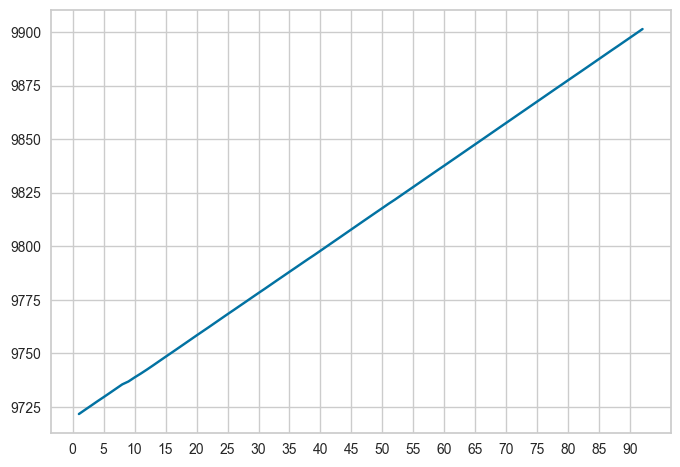

[9721.68234635 9723.68033195 9725.65585271 9727.65584322 9729.58619679
 9731.55047914 9733.53606009 9735.52071379 9736.87932968 9738.78951612
 9740.5819843  9742.47030415 9744.43059563 9746.43043224 9748.42220948
 9750.3903771  9752.377182   9754.37020552 9756.37012756 9758.36995155
 9760.3336419  9762.29709076 9764.2960121  9766.29578886 9768.2944293
 9770.25202681 9772.23134768 9774.20840345 9776.205728   9778.18406225
 9780.13001907 9782.12388705 9784.12382936 9786.09041125 9788.08562391
 9790.04177142 9792.03222986 9794.00319176 9795.92040574 9797.91377006
 9799.9068089  9801.90228575 9803.89447433 9805.89447391 9807.89434234
 9809.89360088 9811.89355862 9813.88175286 9815.87017138 9817.84100738
 9819.84079381 9821.73302702 9823.73084384 9825.72883943 9827.71849806
 9829.71824855 9831.71806293 9833.70801755 9835.70703502 9837.66969349
 9839.66907462 9841.65139962 9843.65115318 9845.647547   9847.64235601
 9849.63221913 9851.63191635 9853.6312821  9855.63043138 9857.62076959
 9859.6

In [28]:
plt.plot([x+1 for x in range(92)],AICs)
plt.xticks([x for x in range(92) if x%5==0])
plt.grid(True)
plt.show()
print(np.array(AICs))

<span style="color:red"> Essendo il modello molto leggero il tempo di fit è sempre uguale, quindi è ovvio che avere più feature sia più informativo e quindi un AIC score migliore <span/>

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### Visualize regression with **yellowbrick** <br />
**y** = true value<br />
**𝑦̂**   = predicted value<br />
**Residuals** = y_pred - y_true<br />
Purtroppo non è possibile cambiare lo scoring method della figura, quindi nella legenda comparirà R^2 invece del nostro error rate, che viene quindi calcolato separatamente.

------------------------ USE BEST PREDICTOR ON **TRAIN** DATA ------------------------

CALCOLIAMO l'error_rate medio nel train.

In [29]:
y_pred=best.predict(F_x)
print(f"\nErrore medio del dataset: {error_rate(F_y,y_pred):.3f}% !")


Errore medio del dataset: 2.760% !


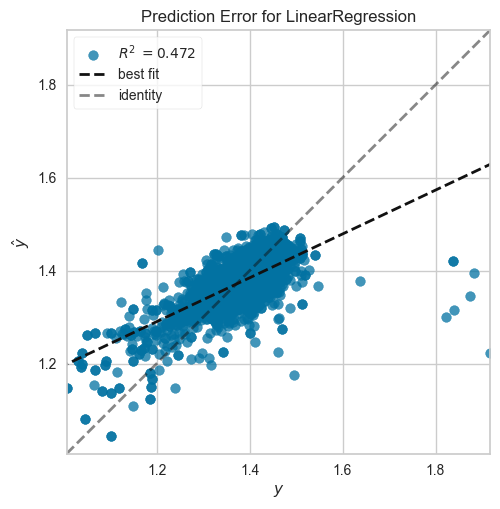

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [30]:
#F_x feature 92 #F_y target

visualizer= PredictionError(best,bestfit=True)

#visualizer.fit(F_x, F_y) # Fit the training data in the visualizer # best is already fitted on F_x F_y!
visualizer.score(F_x, F_y)#train # Evaluate the model on data (train or test)
visualizer.show() # Finalize and render the figure ;

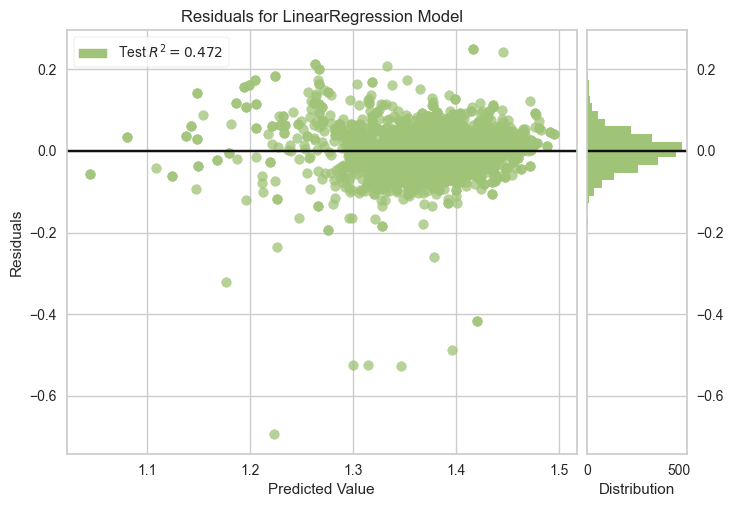

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [31]:
visualizer= ResidualsPlot(best)

#visualizer.fit(F_x, F_y)# Fit the training data in the visualizer # best is alredy fitted on F_x F_y!
visualizer.score(F_x, F_y)#train # Evaluate the model on data (train or test)
visualizer.show() # Finalize and render the figure ;
#facendo il fit questo grafico restituisce anche il train, ma nel nostro caso train e test sono gli stessi, #stiamo testando sul train

##### <span style="color:red">Dall'istogramma laterale vediamo anche la distribuzione dell'errore in metri! <span />

------------------------ USE BEST PREDICTOR ON **TEST** DATA ------------------------

In [32]:
#predict with best predictor
b_pred=best.predict(F_x_test)

#evaluate error_rate
print(f"Error rate: {error_rate(F_y_test,b_pred):.3f}% ")

Error rate: 3.590% 


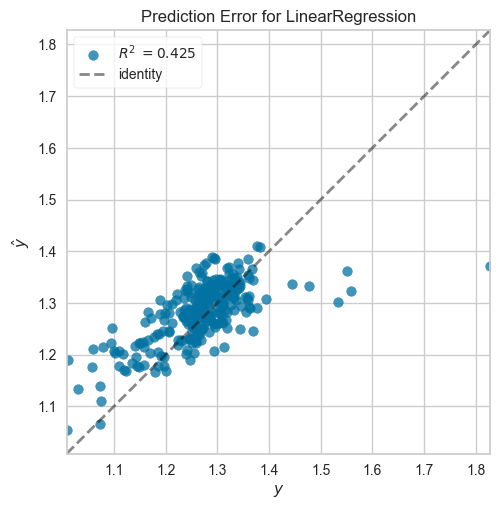

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [33]:
visualizer= PredictionError(best,bestfit=False)

#visualizer.fit(F_x, F_y) # Fit the training data in the visualizer # best is already fitted on F_x F_y!
visualizer.score(F_x_test, F_y_test)#test # Evaluate the model on data (train or test)
visualizer.show() # Finalize and render the figure

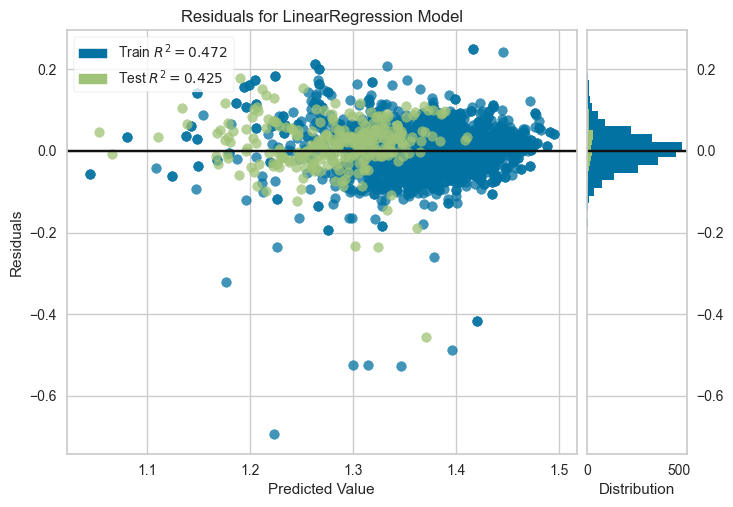

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [34]:
visualizer= ResidualsPlot(best)

visualizer.fit(F_x, F_y) # Fit the training data in the visualizer # best is alredy fitted on F_x F_y!
visualizer.score(F_x_test, F_y_test)#test # Evaluate the model on data (train or test)
visualizer.show() # Finalize and render the figure

##### <span style="color:red">Dall'istogramma laterale vediamo anche la distribuzione dell'errore in metri! <span />

### Vediamo l'R2 score e plottiamolo sopra il boxplot che rappresenta la distribuzione dell' <span style="color:red"> ERRORE IN METRI <span />

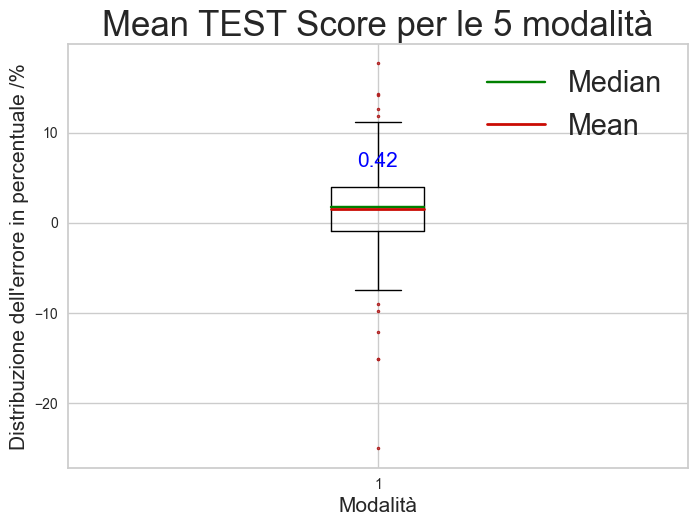

In [35]:
#predict
b_pred=best.predict(F_x_test)
mt_err_dist=((b_pred-F_y_test)/F_y_test)*100
r2_scores=r2_score(F_y_test,b_pred)

flierprops = dict(marker='.',markeredgecolor='firebrick', markersize=3, linestyle='none')
medianprops = dict(linestyle='-', linewidth=1.75, color='green')
meanprops = dict(linestyle='-',linewidth=2,color='r')

bp1=plt.boxplot(mt_err_dist.tolist(), flierprops=flierprops, medianprops=medianprops, showmeans= True, meanline = True, meanprops=meanprops)
plt.text(1,np.mean(mt_err_dist)+np.std(mt_err_dist),int(r2_scores*100)/100,horizontalalignment="center",color="blue",fontsize=15)
plt.xlabel("Modalità",fontsize=15)
plt.ylabel("Distribuzione dell'errore in percentuale /%",fontsize=15)
plt.grid(True)
plt.legend([bp1['medians'][0], bp1['means'][0]], ['Median', 'Mean'], fontsize='xx-large')
plt.title("Mean TEST Score per le 5 modalità",fontsize=25)
plt.show()